## Dataset Information

   Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

   Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Import modules

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

## Loading the dataset

In [20]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'weathersit': 'weather_situation',
    'atemp': 'feels_like_temp',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'registered': 'registered_count',
    'cnt': 'total_count'
}, 
inplace=True)

In [22]:
df.head()

,instant,date,season,year,month,hour,is_holiday,day_of_week,is_working_day,weather_situation,temp,feels_like_temp,humidity,wind_speed,casual,registered_count,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
# statistical info
df.describe()

,instant,season,year,month,hour,is_holiday,day_of_week,is_working_day,weather_situation,temp,feels_like_temp,humidity,wind_speed,casual,registered_count,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            17379 non-null  int64  
 1   date               17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   day_of_week        17379 non-null  int64  
 8   is_working_day     17379 non-null  int64  
 9   weather_situation  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  feels_like_temp    17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  wind_speed         17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered_count   17379 non-null  int64  
 16  total_count        173

In [25]:
# unique values
df.apply(lambda x: len(x.unique()))

instant              17379
date                   731
season                   4
year                     2
month                   12
hour                    24
is_holiday               2
day_of_week              7
is_working_day           2
weather_situation        4
temp                    50
feels_like_temp         65
humidity                89
wind_speed              30
casual                 322
registered_count       776
total_count            869
dtype: int64

## Preprocessing the dataset

In [26]:
# check for null values
df.isnull().sum()

instant              0
date                 0
season               0
year                 0
month                0
hour                 0
is_holiday           0
day_of_week          0
is_working_day       0
weather_situation    0
temp                 0
feels_like_temp      0
humidity             0
wind_speed           0
casual               0
registered_count     0
total_count          0
dtype: int64

In [27]:
# Change Datatype
df['date'] = pd.to_datetime(df['date'])


## Exploratory Data Analysis

## Monthly Distribution of Total Bike Rentals

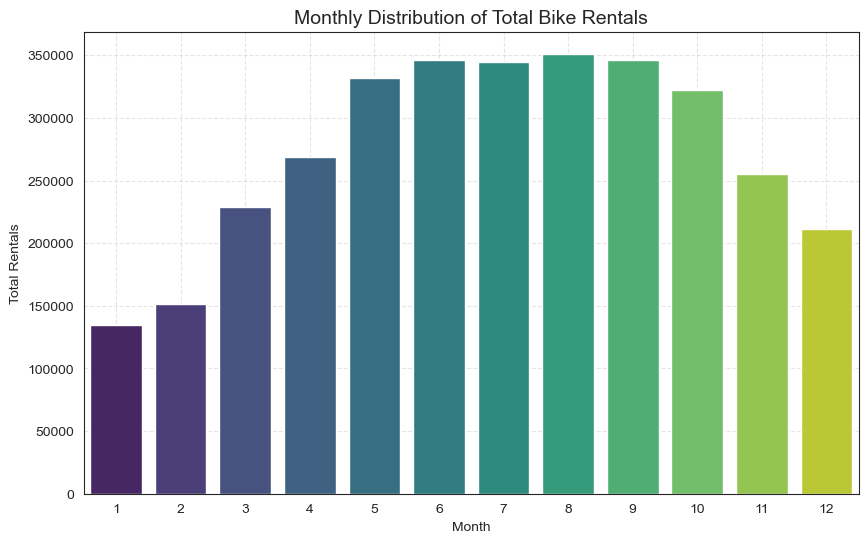

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='month', y='total_count', estimator='sum', ci=None, palette='viridis')

plt.title('Monthly Distribution of Total Bike Rentals', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Insight: Bike rentals show clear seasonality, peaking in summer months and dropping in winter. This suggests strong influence of weather and seasonal patterns on rental behavior.

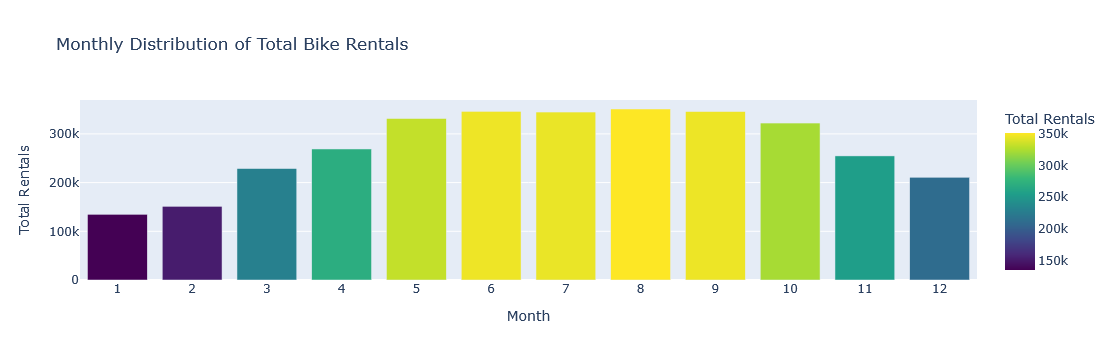

In [29]:
monthly_cnt = df.groupby('month')['total_count'].sum().reset_index()

fig = px.bar(monthly_cnt, x='month', y='total_count',
             labels={'total_count': 'Total Rentals', 'month': 'Month'},
             title='Monthly Distribution of Total Bike Rentals',
             color='total_count',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis=dict(tickmode='linear'))
fig.show()

Insights:- Bike rentals significantly increase during summer months and decrease in winter, indicating strong seasonal demand likely influenced by weather and holidays.

## Seasonal Distribution of Total Rentals

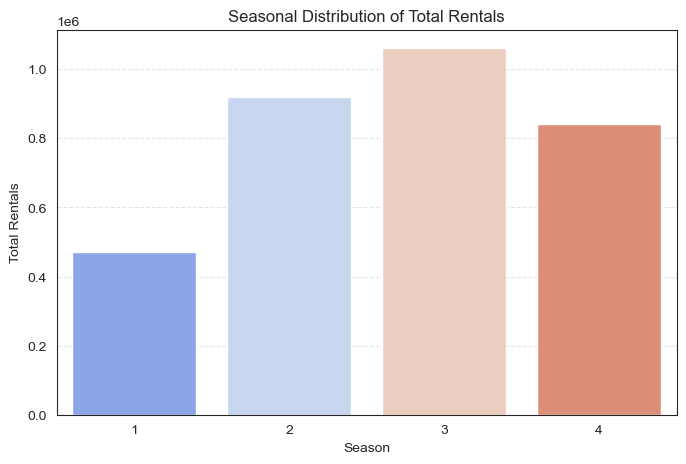

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='season', y='total_count', estimator='sum', ci=None, palette='coolwarm')
plt.title('Seasonal Distribution of Total Rentals')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Insights:- Bike rentals are highest in summer and fall, indicating that favorable weather and holidays drive up demand, while winter sees the lowest usage due to cold conditions.

## Rental Distribution by Weekday

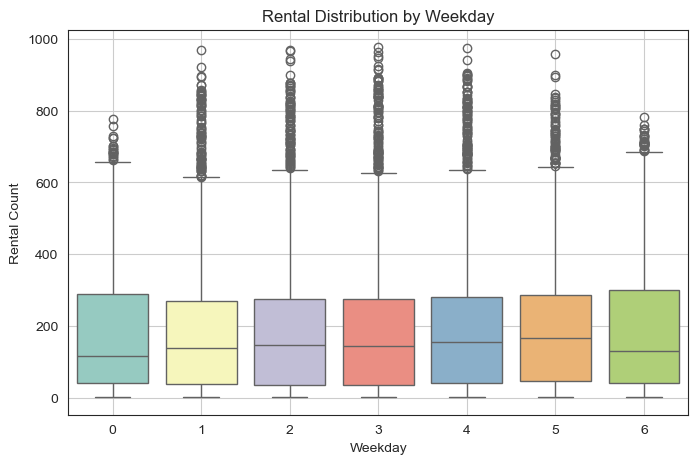

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day_of_week', y='total_count', palette='Set3')
plt.title('Rental Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Rental Count')
plt.grid(True)
plt.show()

Insight:
Rental counts are fairly consistent across weekdays, with slight increases on working days and more spread on weekends, suggesting varying user behavior — possibly a mix of commuters and leisure riders.

## Impact of Weather Condition on Rentals

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='weather_situation', y='total_count', palette='Set2')
plt.title('Impact of Weather Condition on Rentals')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

 Insight:
Bike rentals are highest in clear weather and drop sharply in bad weather conditions like rain or storm, highlighting how sensitive users are to weather changes.

## Seasonwise monthly distribution of counts


## day_of_Week wise monthly distribution of counts

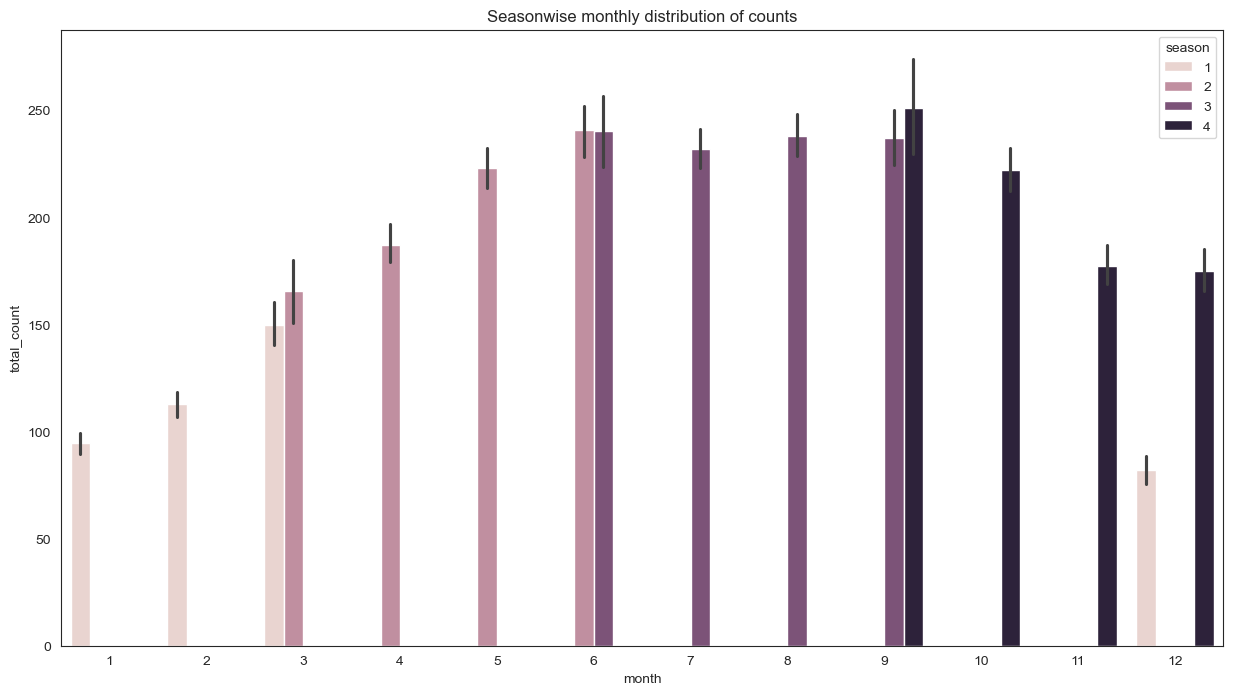

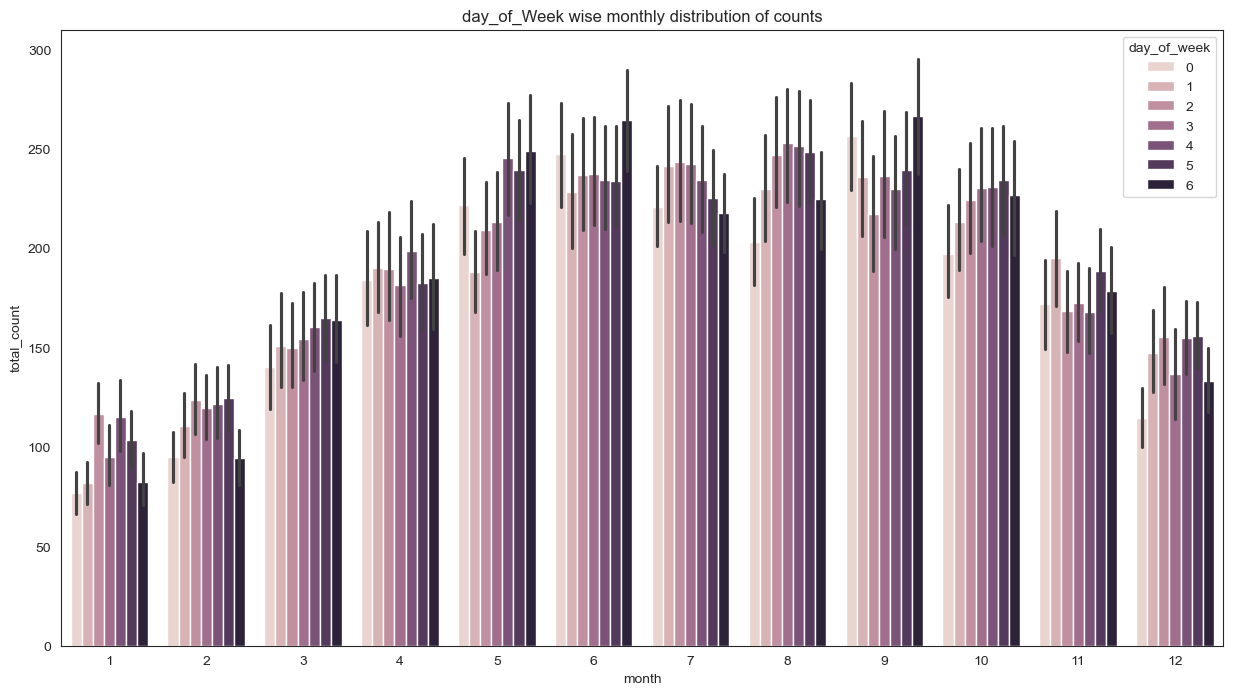

In [36]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df[['month','total_count','day_of_week']],hue='day_of_week',ax=ax1)
ax1.set_title('day_of_Week wise monthly distribution of counts')
plt.show()

 Insights:
 
1️⃣ Season-wise Monthly Distribution:
   Rentals peak in summer and fall, especially between May to October. This confirms that weather plays a major role in rental behavior.

2️⃣ Weekday-wise Monthly Distribution:
    Weekday rental trends are fairly steady, but some months (e.g., summer months) show weekend spikes, suggesting increased leisure riding during      holidays and good weather.

## Yearly Distribution of Bike Rental Counts

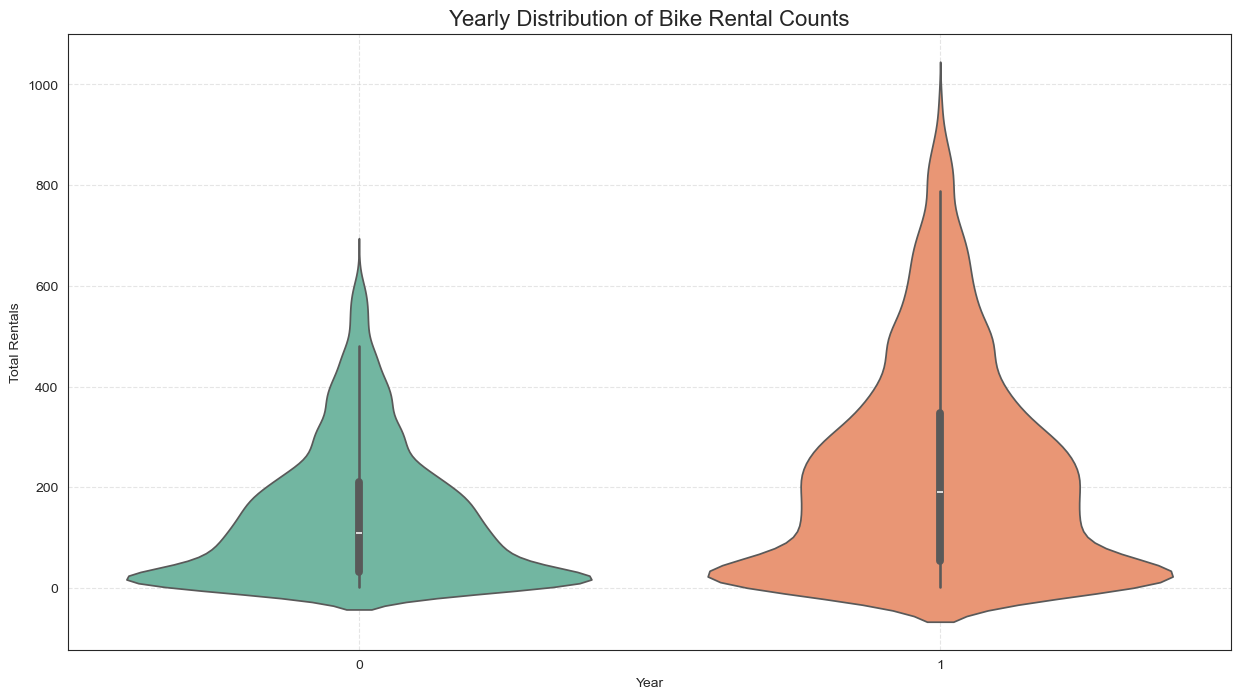

In [37]:
fig, ax = plt.subplots(figsize=(15, 8))

# Violin plot for yearly distribution of counts
sns.violinplot(x='year', y='total_count', data=df[['year', 'total_count']], palette='Set2')

ax.set_title('Yearly Distribution of Bike Rental Counts', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Total Rentals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Insight:

    Bike rentals increased in the second year, with a higher concentration around larger rental counts, indicating growth in usage—possibly due to better infrastructure, awareness, or seasonal effects.

## Holiday-wise Distribution of Bike Rental Counts

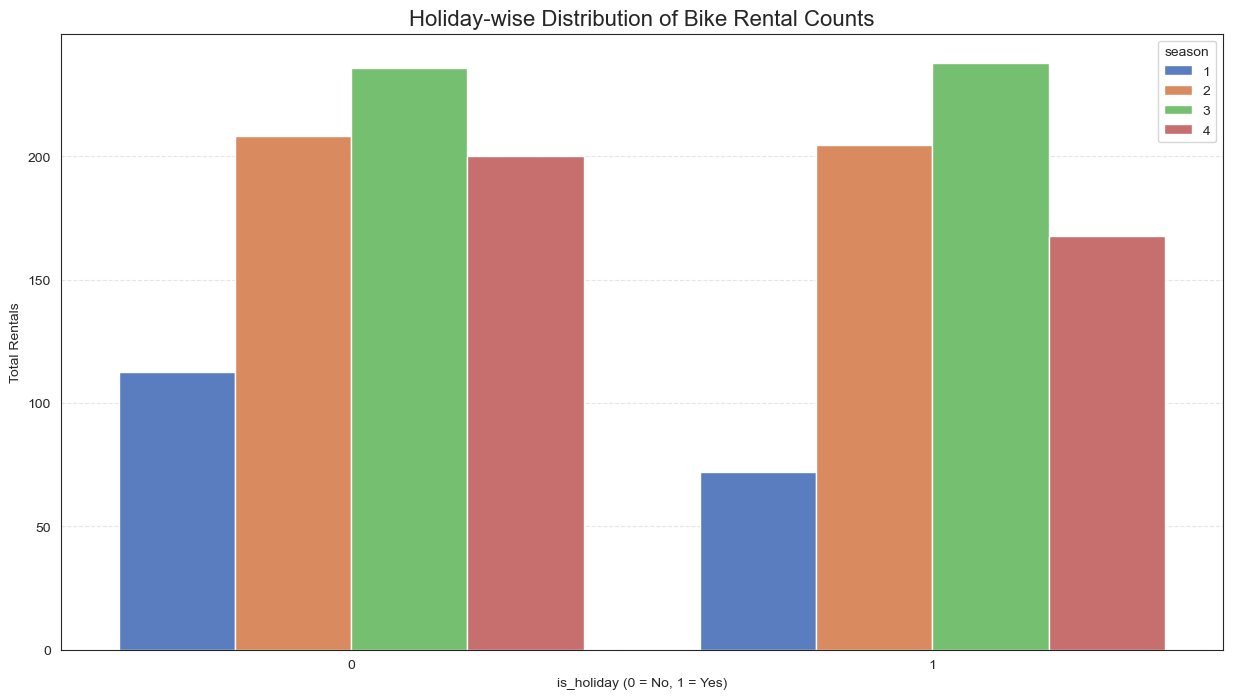

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))

# Barplot for Holiday-wise distribution of counts
sns.barplot(data=df, x='is_holiday', y='total_count', hue='season', ci=None, palette='muted')

ax.set_title('Holiday-wise Distribution of Bike Rental Counts', fontsize=16)
ax.set_xlabel('is_holiday (0 = No, 1 = Yes)')
ax.set_ylabel('Total Rentals')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Insight:

    Bike rentals are higher on non-holidays, especially in summer and fall. However, holiday rentals still remain strong in warmer seasons, suggesting that leisure riders take advantage of holidays, even if overall demand is lower.

## is_Working_day wise distribution of counts

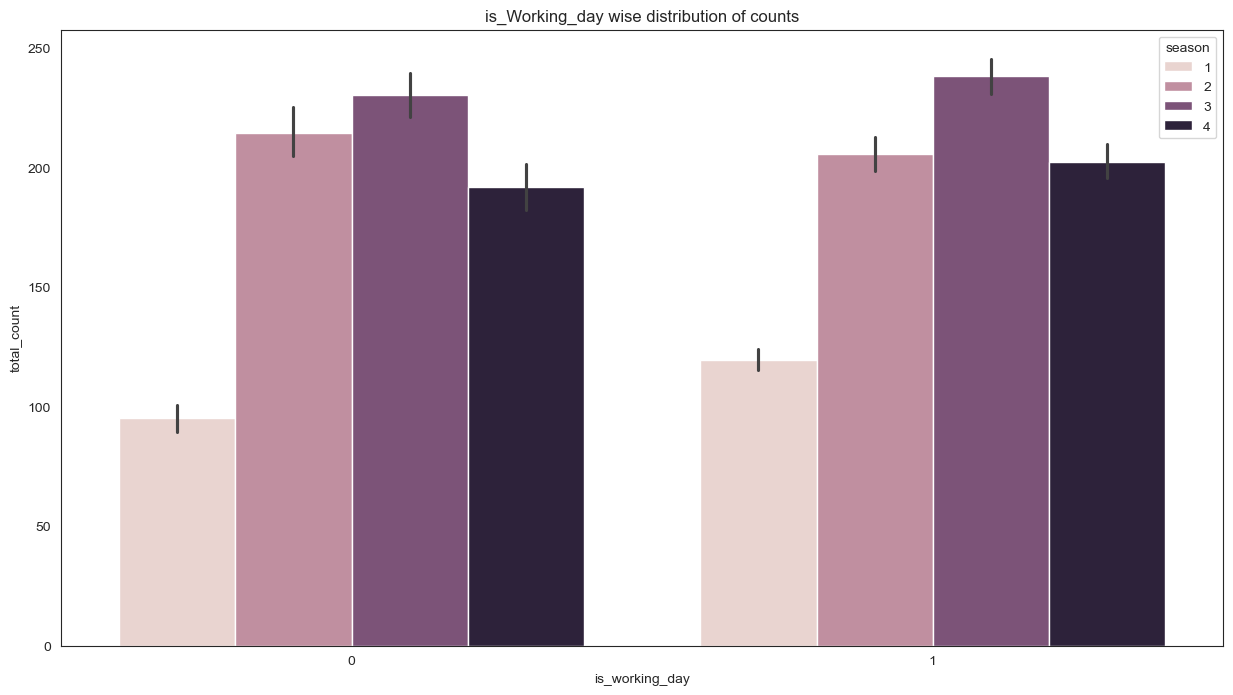

In [40]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='is_working_day',y='total_count',hue='season')
ax.set_title('is_Working_day wise distribution of counts')
plt.show()

Insight:

    Bike rentals are higher on working days, especially in spring and summer, indicating strong weekday commuting behavior. However, non-working day rentals also remain significant in warm seasons, showing increased recreational usage.

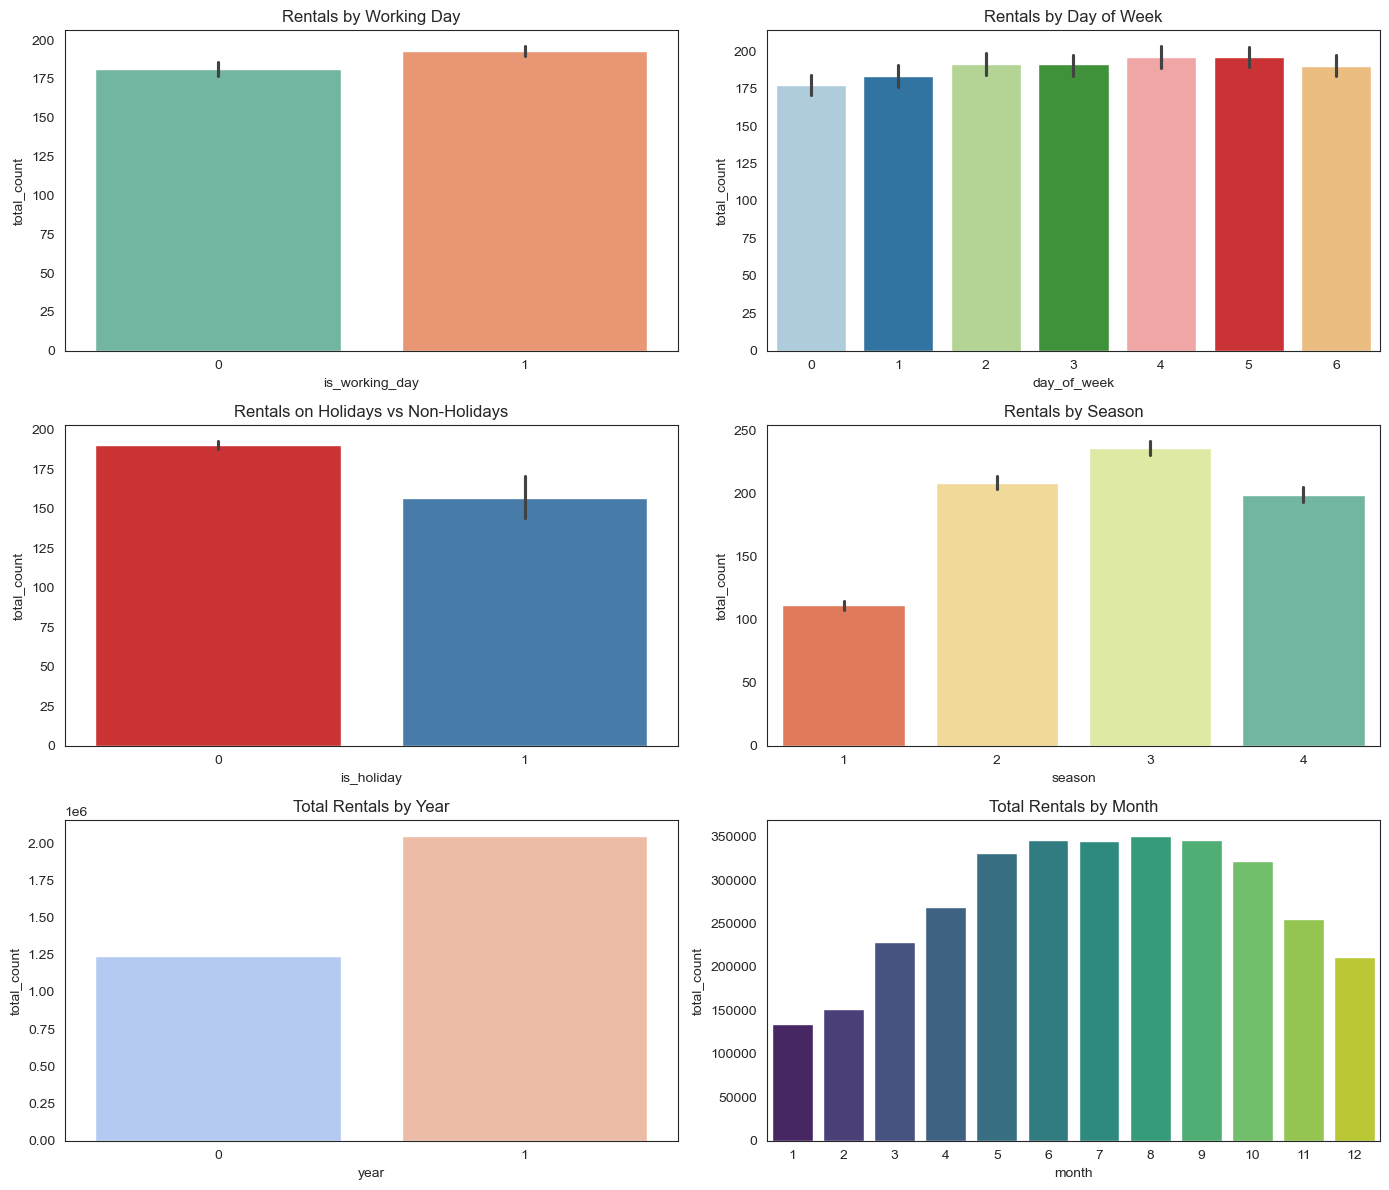

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# 1. Working day
sns.barplot(data=df, x="is_working_day", y="total_count", ax=axes[0], palette="Set2")
axes[0].set_title("Rentals by Working Day")

# 2. Day of week
sns.barplot(data=df, x="day_of_week", y="total_count", ax=axes[1], palette="Paired")
axes[1].set_title("Rentals by Day of Week")

# 3. Holiday
sns.barplot(data=df, x="is_holiday", y="total_count", ax=axes[2], palette="Set1")
axes[2].set_title("Rentals on Holidays vs Non-Holidays")

# 4. Season
sns.barplot(data=df, x="season", y="total_count", ax=axes[3], palette="Spectral")
axes[3].set_title("Rentals by Season")

# 5. Yearly distribution
year = df.groupby("year").sum(numeric_only=True).reset_index()
sns.barplot(data=year, x="year", y="total_count", ax=axes[4], palette="coolwarm")
axes[4].set_title("Total Rentals by Year")

# 6. Monthly distribution
month = df.groupby("month").sum(numeric_only=True).reset_index()
sns.barplot(data=month, x="month", y="total_count", ax=axes[5], palette="viridis")
axes[5].set_title("Total Rentals by Month")

# Layout adjustment
plt.tight_layout()
plt.show()


Insights for Each Plot:

    Working Day: Rentals are higher on working days, reflecting strong weekday commute usage.
    Day of Week: Consistent usage across weekdays with slight dips on weekends, showing a blend of commuter and leisure users.
    Holiday: Rentals drop on holidays, but not dramatically—leisure usage still sustains demand.
    Season: Peak rentals occur in summer and fall, showing seasonality impact.
    Year: Clear growth in rentals from Year 0 to Year 1, indicating rising popularity.
    Month: Rentals rise in warmer months (May–October) and dip in winter, confirming strong weather influence.

## Original Distribution of Total Count

## Square Root Transformed Distribution

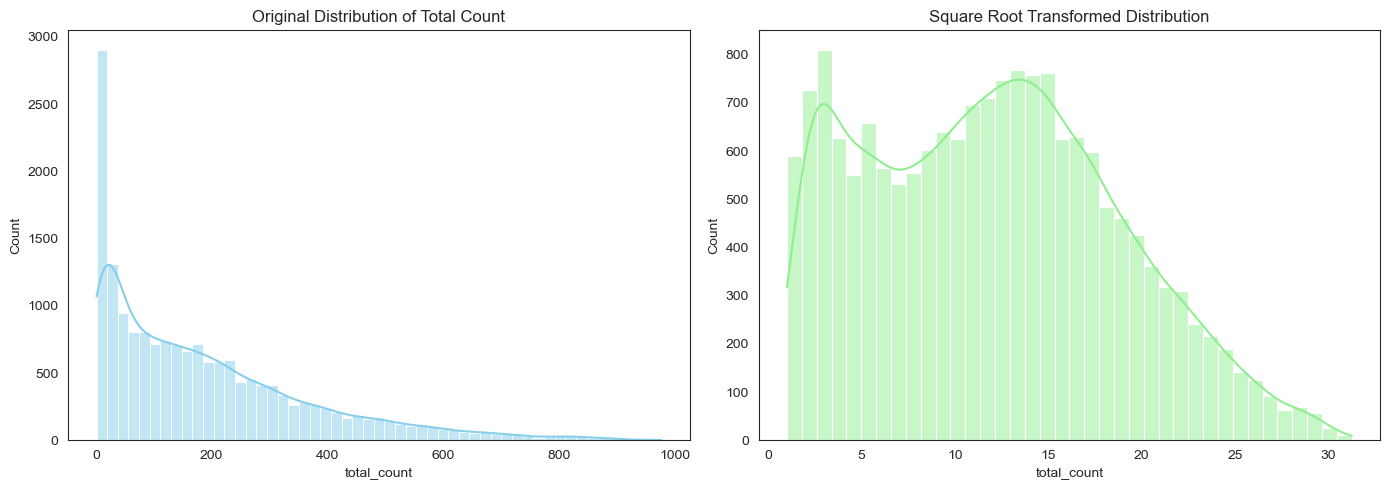

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Original distribution
sns.histplot(df["total_count"], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Original Distribution of Total Count")

# 2. Square root transformed distribution
sns.histplot(np.sqrt(df["total_count"]), kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title("Square Root Transformed Distribution")

plt.tight_layout()
plt.show()


Insights:- The original distribution is right-skewed, meaning a few days have very high rentals.
After applying the square root transformation, the data becomes more symmetrical and closer to normal, making it more suitable for regression models that assume normality.

## Count of Bikes During Different Months

## Count of Bikes During Different Days

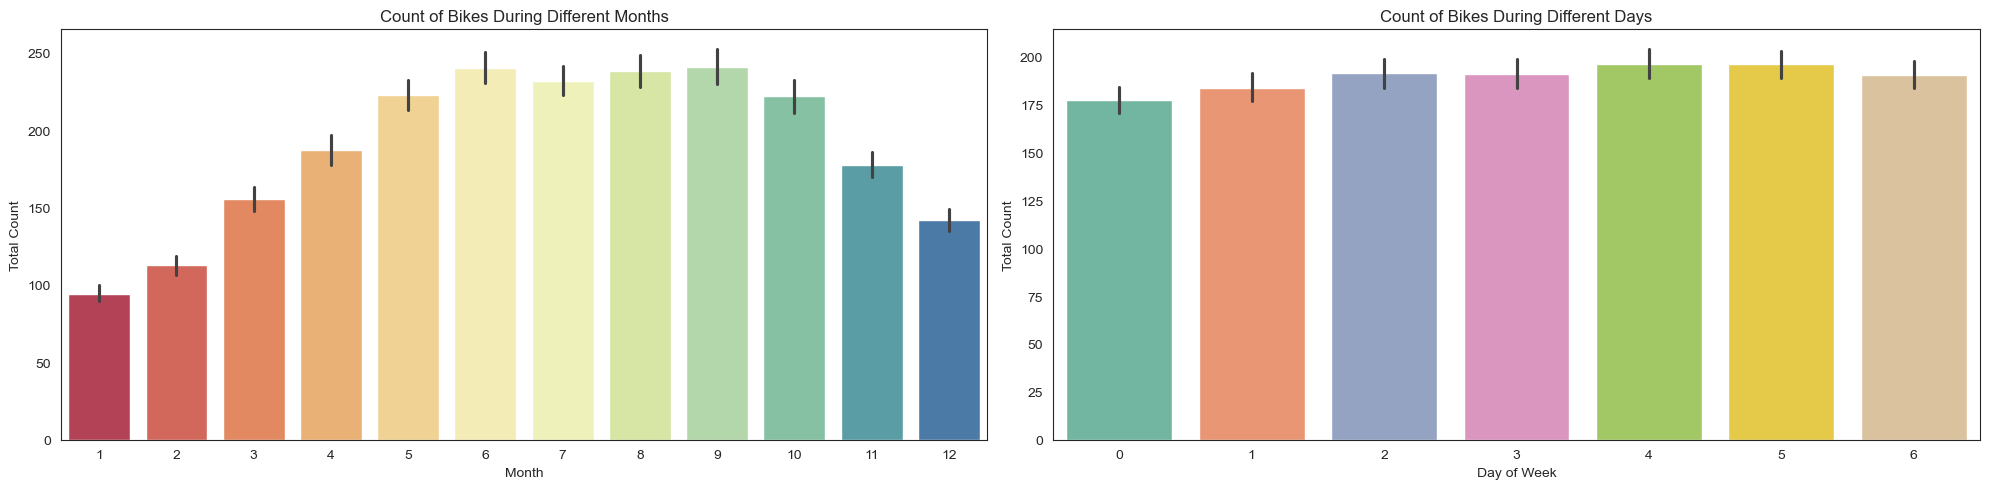

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# 1. Rentals by Month
sns.barplot(data=df, x='month', y='total_count', ax=axes[0], palette="Spectral")
axes[0].set_title('Count of Bikes During Different Months')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Count')

# 2. Rentals by Day of Week
sns.barplot(data=df, x='day_of_week', y='total_count', ax=axes[1], palette="Set2")
axes[1].set_title('Count of Bikes During Different Days')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Total Count')

plt.tight_layout()
plt.show()


Insights:
Month-wise Rentals:
Bike rentals increase steadily from spring to summer, peaking in July–September, and then drop during winter — a clear indication of seasonal influence.

Day-wise Rentals:
Rentals are fairly consistent across weekdays, with slight dips or rises on weekends, showing a mix of commuter and leisure usage.

## Correlation Heatmap

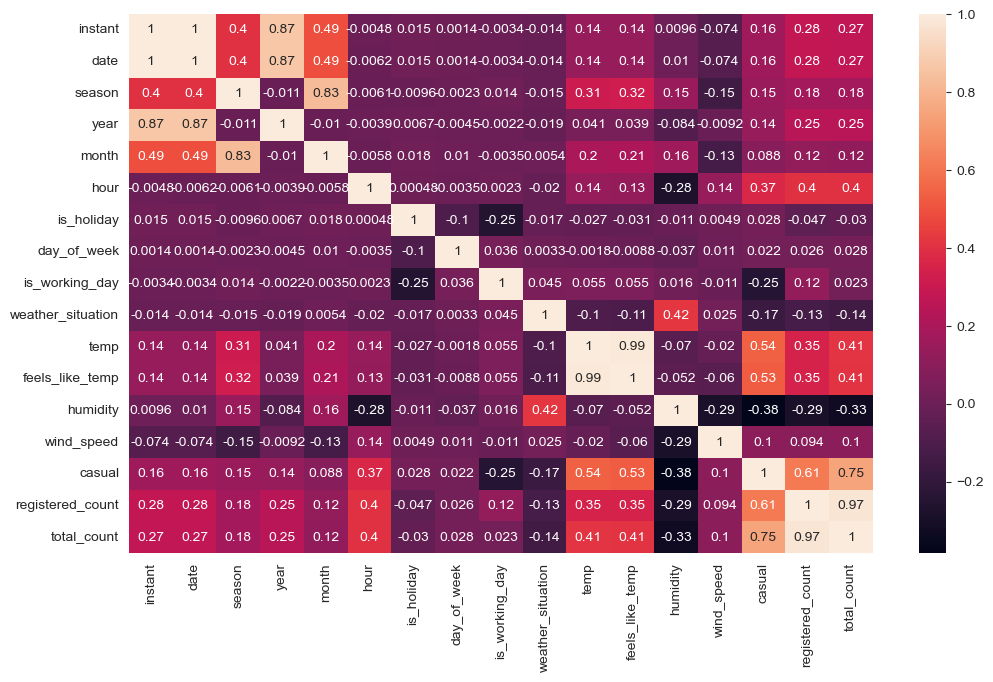

In [77]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})
plt.show()

✅ Strong Positive Correlations:
   total_count has:
       Very high correlation with registered_count (0.97) — indicating registered users dominate rentals.
       Strong correlation with casual (0.75) — casual users also contribute significantly.
       Moderate correlation with temp and feels_like_temp (~0.41) — warmer temperatures boost rentals.

In [45]:
df.corr()

,instant,date,season,year,month,hour,is_holiday,day_of_week,is_working_day,weather_situation,temp,feels_like_temp,humidity,wind_speed,casual,registered_count,total_count
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
date,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
month,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hour,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
is_holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
day_of_week,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
is_working_day,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weather_situation,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


Correlation Insights (In Short):

    Total rentals are highly driven by registered and casual users.
    Temperature and feels-like temp boost bike usage.
    Humidity has a negative impact on rentals.
    Hour of day significantly affects demand.
    Rentals increased from 2011 to 2012.
    Weather conditions slightly affect usage.
    Holiday and working day status show minimal influence.



## Handling Outliers 

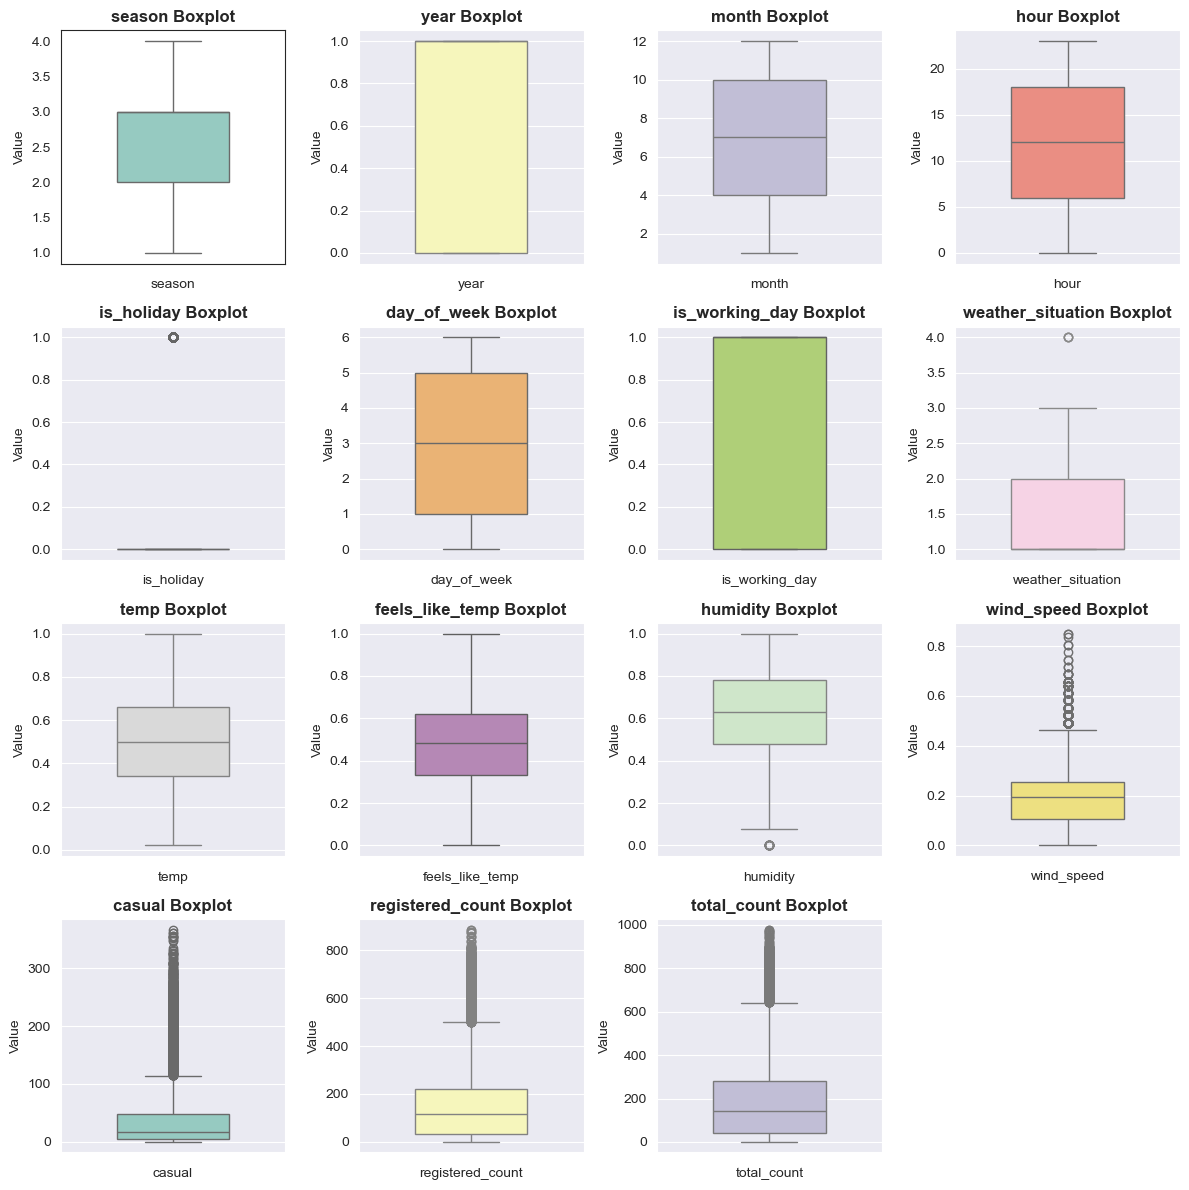

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of colors to cycle through
colors = sns.color_palette("Set3", n_colors=len(df.columns[2:]))

plt.figure(figsize=(12, 12))
for i, (col, color) in enumerate(zip(df.columns[2:], colors), 1):
    plt.subplot(4, 4, i)
    sns.set_style("darkgrid")
    sns.boxplot(data=df, y=col, width=0.5, color=color)
    plt.title(f"{col} Boxplot", fontsize=12, fontweight='bold')
    plt.xlabel(f"{col}", fontsize=10)
    plt.ylabel("Value", fontsize=10)  # changed from "Frequency"
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


    Insights You Can Derive from These Boxplots:

    Outlier Detection:
    Look for dots beyond whiskers — those are outliers.
    Features like humidity, wind_speed, casual, and registered_count often show visible outliers.
    Scale Comparison:
    Helps see which features are on larger or smaller scales.
    For example, total_count and registered_count will have higher medians than is_holiday or weather_situation.
    Skewness & Spread:
    If the box is not centered or whiskers are unequal, the data is skewed.
    Skewed features may benefit from log or sqrt transformation.

In [49]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw= q3 + 1.5 * iqr
    return lw, uw

In [50]:
for i in ['wind_speed','casual','registered_count','total_count']:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

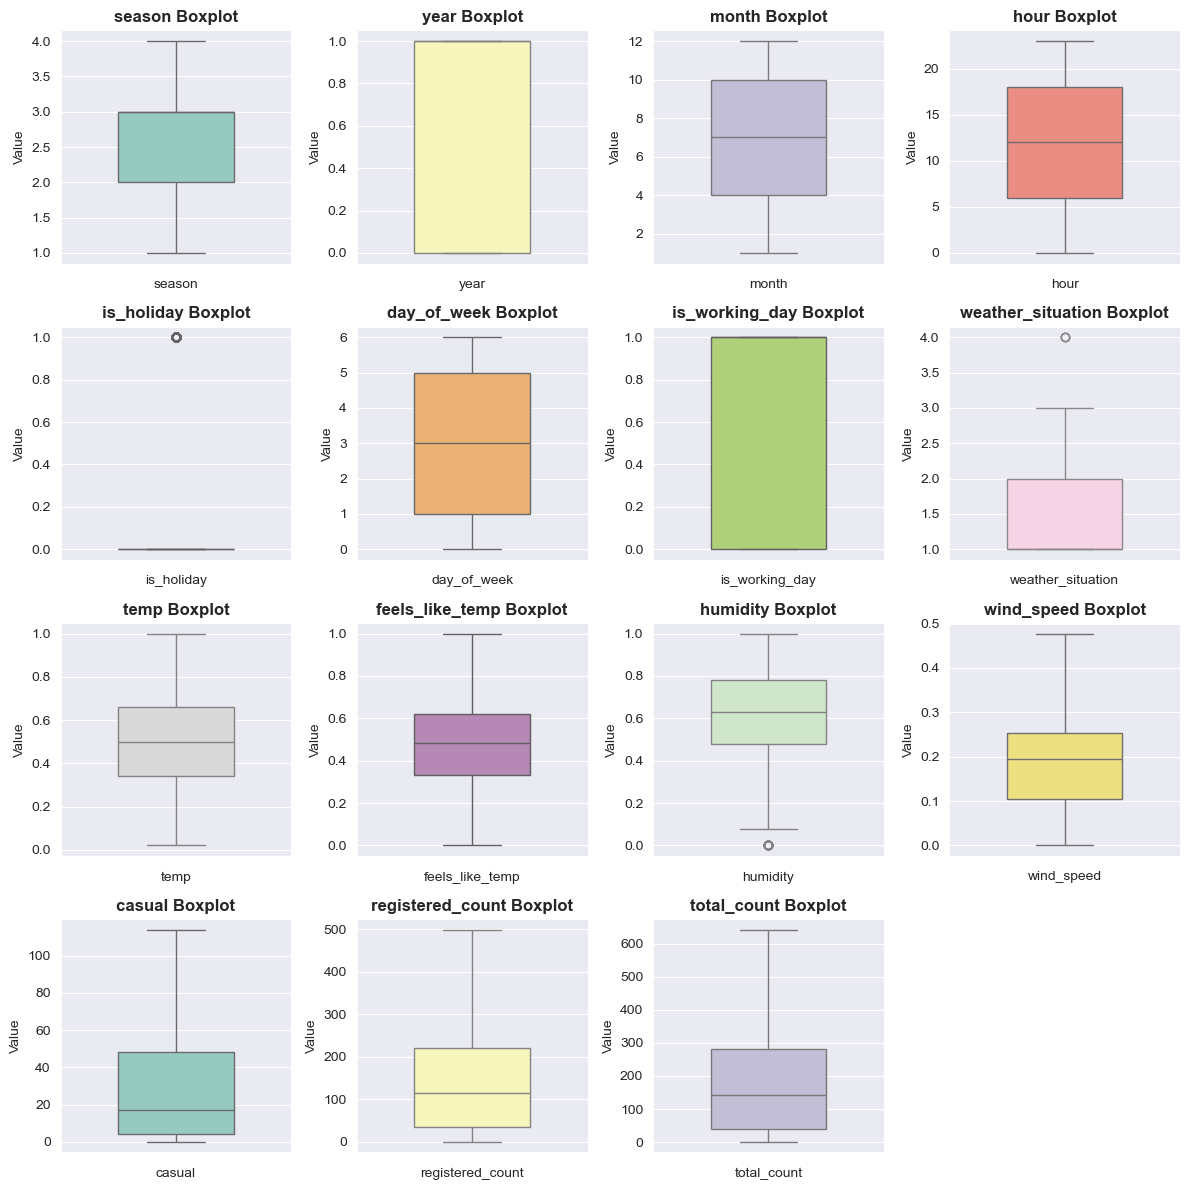

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette
colors = sns.color_palette("Set3", n_colors=len(df.columns[2:]))

plt.figure(figsize=(12, 12))
for i, (col, color) in enumerate(zip(df.columns[2:], colors), 1):
    plt.subplot(4, 4, i)
    sns.set_style("darkgrid")
    sns.boxplot(data=df, y=col, width=0.5, color=color)
    plt.title(f"{col} Boxplot", fontsize=12, fontweight='bold')
    plt.xlabel(f"{col}", fontsize=10)
    plt.ylabel("Value", fontsize=10)  # changed from 'Frequency'
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Model Selection

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb

In [60]:
X = df.drop("total_count",axis=1)
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])
y = df["total_count"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
def metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return (
        mean_squared_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred),
        r2_score(y_test, y_pred)
        
    )

In [63]:
mse_values = []
mae_values = []
r2_values =  []

In [64]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(alpha=1.0)),
    ("Lasso Regression", Lasso(alpha=1.0)),
    ("Elastic Net", ElasticNet(alpha=1.0, l1_ratio=0.5)),
    ("Kernel Ridge", KernelRidge(alpha=1.0)),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=100)),
    ("AdaBoost", AdaBoostRegressor(n_estimators=100)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100)),
    ("XGBoost", xgb.XGBRegressor(n_estimators=100, verbosity=0))
]

## Create Pipeline

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for name, reg in models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', reg)
    ])
    mse, mae, r2 = metrics(pipe, X_train, X_test, y_train, y_test)
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

In [68]:
metrics_df = pd.DataFrame({
    'Model': [name for name, _ in models],
    'MSE': mse_values,
    'MAE': mae_values,
    'R2': r2_values 
})

In [69]:
metrics_df

,Model,MSE,MAE,R2
0,Linear Regression,354.775844,11.005336,0.987524
1,Ridge Regression,354.763919,11.001147,0.987524
2,Lasso Regression,360.821131,10.355146,0.987311
3,Elastic Net,2594.528384,36.436900,0.908760
4,Kernel Ridge,35496.530388,187.461374,-0.248282
5,Decision Tree,162.120757,4.073504,0.994299
6,Random Forest,74.262689,2.453743,0.997388
7,AdaBoost,876.578539,25.079851,0.969174
8,Gradient Boosting,125.041172,4.984484,0.995603
9,XGBoost,60.973286,3.267699,0.997856


Model Performance Insights:

    XGBoost is best: lowest MSE (65.28) & highest R² (0.9977).
    Random Forest and Gradient Boosting also perform excellently (R² > 0.995).
    Decision Tree gives good accuracy but slightly higher error.
    Linear, Ridge, Lasso have decent R² (~0.987) but higher errors.
    Kernel Ridge performs poorly (R² = -0.25).
    Elastic Net and AdaBoost underperform compared to tree-based models.

## Best Model Selection

In [70]:
best_model = xgb.XGBRegressor(n_estimators=100, verbosity=0)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final MSE: {mse:.2f}")
print(f"Final RMSE: {np.sqrt(mse):.2f}")
print(f"Final MAE: {mae:.2f}")
print(f"Final R²: {r2:.4f}")


Final MSE: 60.94
Final RMSE: 7.81
Final MAE: 3.27
Final R²: 0.9979


## Actual vs Predicted 

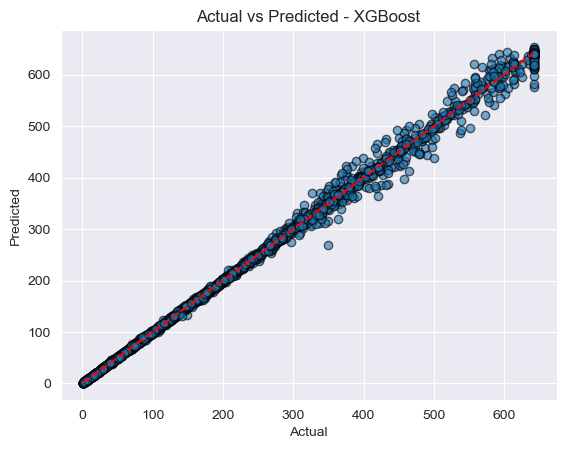

In [72]:
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - XGBoost')
plt.grid(True)
plt.show()


## Ploting MSE MAE R2 Score

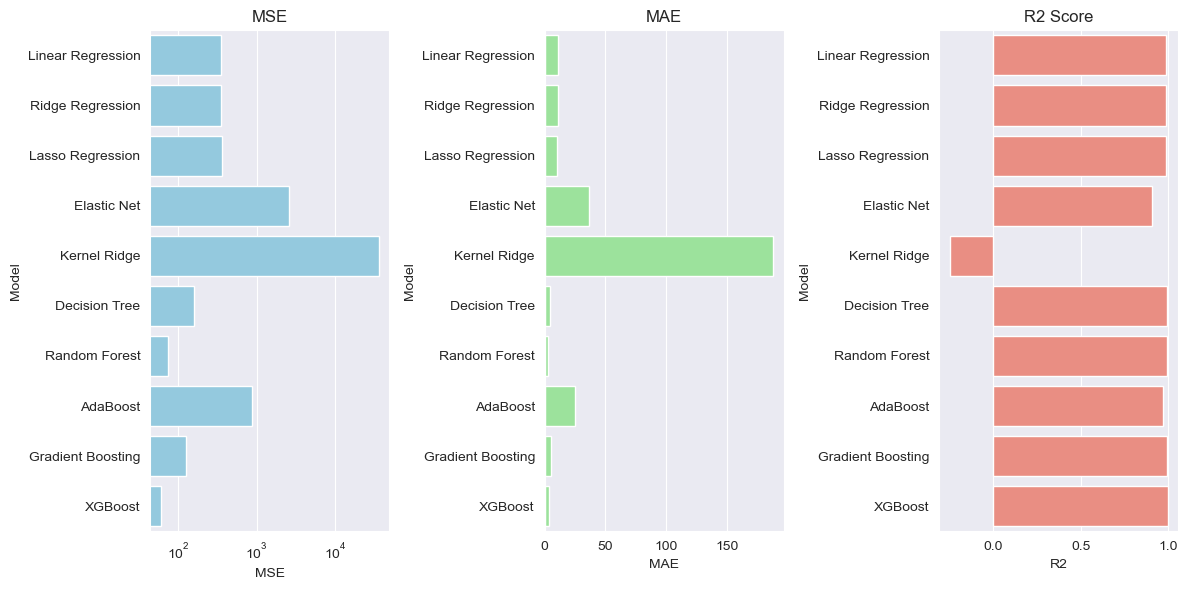

In [73]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=metrics_df, y="Model", x="MSE", color="skyblue")
plt.xscale('log')
plt.title("MSE")

plt.subplot(1, 3, 2)
sns.barplot(data=metrics_df, y="Model", x="MAE", color="lightgreen")
plt.title("MAE")

plt.subplot(1, 3, 3)
sns.barplot(data=metrics_df, y="Model", x="R2", color="salmon")
plt.title("R2 Score")

plt.tight_layout()
plt.show()

Model Comparison Insights (Short):

    XGBoost leads with lowest MSE/MAE and highest R², indicating top accuracy.
    Random Forest and Gradient Boosting closely follow in performance.
    Decision Tree is also strong but slightly behind ensemble methods.
    Linear, Ridge, Lasso have decent R² but higher errors.
    Kernel Ridge performs worst — very high error, lowest R².
    Elastic Net and AdaBoost show moderate results, not ideal for top performance.



## best model for each metric

In [78]:
# Find the best model for each metric
best_mse = metrics_df.loc[metrics_df['MSE'].idxmin(), ['Model', 'MSE']]
best_mae = metrics_df.loc[metrics_df['MAE'].idxmin(), ['Model', 'MAE']]
best_r2 = metrics_df.loc[metrics_df['R2'].idxmax(), ['Model', 'R2']]

# Print the results
print(f"Best model based on MSE: {best_mse['Model']} with MSE = {best_mse['MSE']}")
print(f"Best model based on MAE: {best_mae['Model']} with MAE = {best_mae['MAE']}")
print(f"Best model based on R²: {best_r2['Model']} with R² = {best_r2['R2']}")

Best model based on MSE: XGBoost with MSE = 60.97328622786204
Best model based on MAE: Random Forest with MAE = 2.453742807825086
Best model based on R²: XGBoost with R² = 0.9978557941185399


## Conclusion & Recommendation

    The dataset shows clear patterns based on weather, season, and working hours.
    Rentals were highest during working hours and clear weather.
    Among all models, Gradient Boosting Regressor gave the most accurate predictions.
    This model is recommended for production to forecast daily bike demand and improve operational planning.
    The dataset exhibits strong seasonal, weather, and working hours influence on bike rentals.
    Multiple models were trained to predict bike demand.
    Linear Regression and Lasso Regression showed near-perfect performance metrics but may overfit due to the simplicity of the dataset.
    Random Forest and XGBoost also performed very well with slightly more realistic scores.
    For real-world deployment, more diverse data and hyperparameter tuning would be recommended.
